<a href="https://colab.research.google.com/github/AY0ungKim/AI-Study/blob/main/Training_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**서울대학교 머신러닝 딥러닝 이준석 교수님 강의 정리**

## Training Neural Networks 1

## 1. Activation Functions

- 고려해야할 점:

> 1. **gradient가 죽거나** 폭발하지 않는가?

> 2. zero-centered 인가?

> 3. 계산이 효율적인가?

<br/>

- 종류

>- Sigmoid Function (쓰지 말 것)

>> 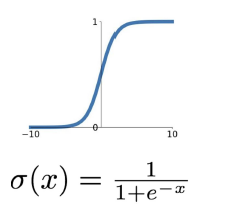


>> 문제점:

>>> 1. **Killed Gradients**: 5이상이거나 -5 이하의 x가 들어오면 sigmoid를 미분한 식에 x를 대입한게 거의 0이 되서, upstream gradient가 거의 0으로 수렴하게 됨 (sigmoid는 미분하면 sigmoid * (1-sigmoid)인데, x가 커지든 작아지든 이 값이 0이 나오게 됨)

>>> 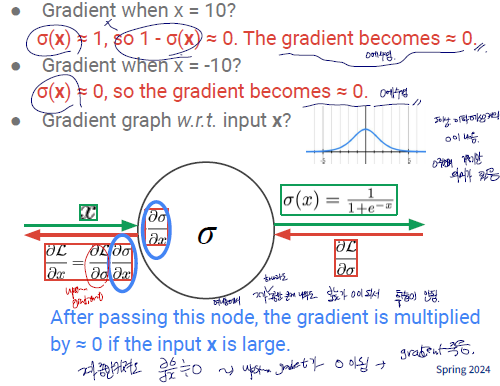

>>> 2. **Not zero-centered**: input(x)가 항상 양수라고 가정하면, sigmoid를 w에 대해 미분한 값은 항상 양수가 나옴 (아래 식)


>>> 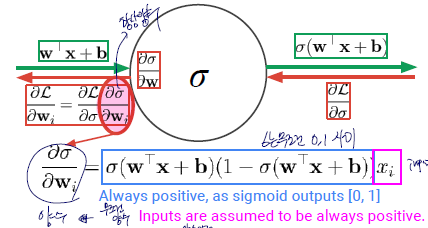


>>>- 즉, 항상 양수의 값을 upstream gradient에 곱하게 되므로 부호가 업데이트되지 않음 -> 모두 양수이거나 모두 음수! 그렇다면, 양수+음수로 이동해야하는 optimal gradient의 상황에서, 양수+양수 or 음수+음수로 이동하게 되면서 비효율적인 이동을 할 수 있음


<br/>

>- Tanh Function (쓰지 말것)

>> zero-centered를 하기 위함


>> 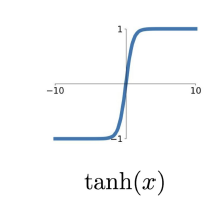

>> 문제점: killed gradient 문제 해결 못함



>- ReLU (Rectified Linear Unit) **가장 많이 사용**

>> 음수 영역에서는 0으로, 양수 영역에서는 해당 input이 그대로 들어가는 방식 (양수 쪽에서 기울기가 사라지지 않음)

>> 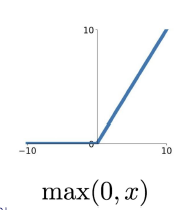


>> 문제점 (그렇게 큰 문제는 아님):

>>> 1. Not zero-centered

>>> 2. x=0에서 미분 불가능


>>> 3. **Dead ReLU problem**: 음수 영역에서는 무조건 0이 나오므로 initial output이 만약에 음수라면 모두 0이 나와서 업데이트가 안될 것 -> 0.01정도로 bias를 주는 것도 좋음


>- Learky ReLU

>> 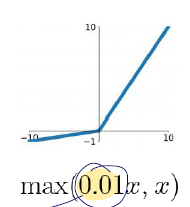


>> ReLU에서 Dead ReLU problem 극복 가능 (음수 영역에서도 적은 가중치 부여)

>> 빠름

>> Kille gradient 문제 해결 가능


>> 문제점:

>>> 1. 음수 영역에서 x에 대한 coefficient를 따로 찾아야함 (additional hyperparameter가 존재하게 됨)

>>> 2. not zero-centered

>- ELU (Exponential Linear Unit)

>> 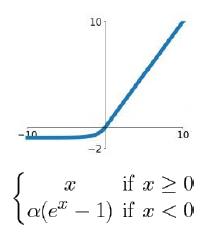


>> ReLU에 zero centered를 시킨 것



>> 문제점: exp 는 계산이 상대적으로 복잡



- **실전에서 사용**: 일단 ReLU 써라!!!! 그 다음, Leaky ReLU나 ELU를 써보긴 해라. 단, sigmoid나 tanh는 쓰지 마라. 마지막에 확률 계산하고 싶으면 마지막에만 써라.



---

## 2. Data Preprocessing & Augmentation


- Zero-centering + Normalization: 데이터 전처리 과정에서 단위가 다른 데이터들 다루기 위함.

> 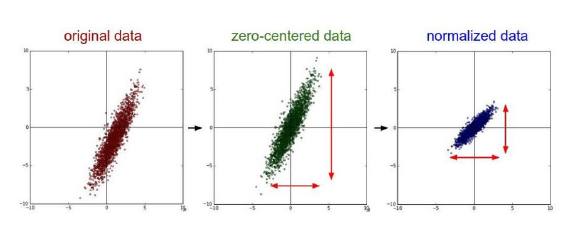

- **Data Augmentation**

> 아래 그림처럼, 하나의 사진을 갖고 픽셀단위로 여러번 변화를 줘서 여러 장의 사진을 만들어 training에 활용하는 방법


> 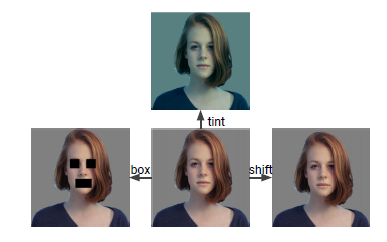




> 종류:

>- Horizontal Flips: 좌우 반전 및 상하 반전

>- Random Crops: 한 이미지를 random하게 잘라내기

>> 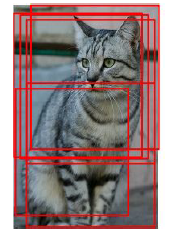


>- Scaling

>> 실전에서는 training에서 random crop을 하고 testing에서 scaling을 통해 각 size에서 crop한 것으로 분류하는 등의 과정을 할 수 있다.


>- Color Jittering





---


## 3. Weight Initialization

- 배경: 초기 가중치를 너무 작거나 너무 크게 설정하면, 학습이 진행되지 않을 수 있음


- 후보1. **Xavier Initilalization** (tanh에서)

>> weight=1/root(input의 차원)으로 정의 (iid 가정하)

- 후보 2. **Kaiming/MSRA Initialization** (ReLU에서)

>> weight=1/(2*root(input의 차원))으로 정의




---


## 4. Learning Rate 정하기

- 배경: 너무 learning rate이 크면 loss가 무한대로 발산하거나 처음에는 확 작아지다가 일정 수준에서 더 작아지지 않고,learning rate이 너무 작으면 너무 천천히 감소함


>> 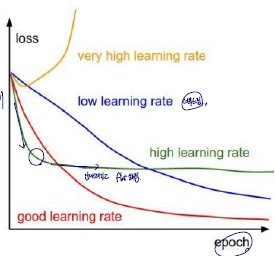


- 정하는 방법 : 큼지막하게 몇개를 설정하고 epoch에 따른 loss 변화를 살펴봐서 정하기.

- Learning Rate Decay: 처음에는 좀 크게 설정해서 loss를 확 줄이고, 중간부터 좀 작은 learning rate을 사용해서 loss를 줄이는 방법.

>> 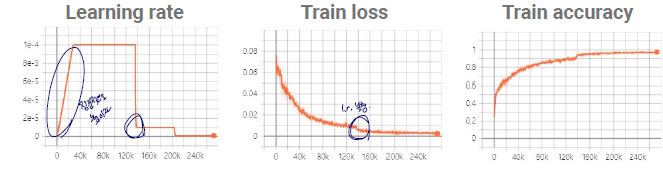
